In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
from sklearn.datasets import load_breast_cancer

bc=load_breast_cancer()


In [42]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

#Dataset Info

In [43]:
bc.target[500]


1

In [44]:
bc.target.shape

(569,)

In [ ]:
bc.data[500]

array([1.504e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
       7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
       2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
       1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
       1.135e-01, 2.176e-01, 1.856e-01, 1.018e-01, 2.177e-01, 8.549e-02])

In [45]:
bc.data.shape

(569, 30)

#Preprocessing

In [46]:
from sklearn.model_selection  import train_test_split

x_train,x_test,y_train,y_test=train_test_split(bc.data,bc.target,test_size=0.2)


In [47]:
print(f"Features:xtrain:{x_train.shape},xtest:{x_test.shape}")
print(f"Labels:xtrain:{y_train.shape},xtest:{y_test.shape}")

Features:xtrain:(455, 30),xtest:(114, 30)
Labels:xtrain:(455,),xtest:(114,)


In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [49]:
x_train[10]

array([0.29622793, 0.33737024, 0.29769885, 0.1695606 , 0.27272727,
       0.31568615, 0.2366448 , 0.14080517, 0.27323232, 0.30923077,
       0.06039295, 0.10018122, 0.12247862, 0.03278347, 0.1487718 ,
       0.48305645, 0.19401515, 0.25913999, 0.10381606, 0.25006564,
       0.29801587, 0.3511471 , 0.36105987, 0.16887397, 0.32311959,
       0.52130085, 0.56034188, 0.46744747, 0.30411024, 0.45821855])

Classification

In [50]:
from sklearn.metrics import accuracy_score,precision_score,recall_score               #confusion_matrix

def calculate_metrics(y_train,y_test,y_pred_train,y_pred_test):
  acc_train=accuracy_score(y_true=y_train,y_pred=y_pred_train)
  acc_test=accuracy_score(y_true=y_test,y_pred=y_pred_test)

  p=precision_score(y_true=y_test,y_pred=y_pred_test)
  r=recall_score(y_true=y_test,y_pred=y_pred_test)

  print(f"acc train:{acc_train}-acc test:{acc_test}-precision:{p}-recall:{r}")

  return acc_train,acc_test,p,r



##1.Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [52]:
y_pred_train=gnb.predict(x_train)
y_pred_test=gnb.predict(x_test)

acc_train_gnb,acc_test_gnb,p_gnb,r_gnb=calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train:0.9340659340659341-acc test:0.9385964912280702-precision:0.9736842105263158-recall:0.9367088607594937


##2.KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=8,algorithm='kd_tree',leaf_size=28)
knn.fit(x_train,y_train)


KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [57]:
y_pred_train=knn.predict(x_train)
y_pred_test=knn.predict(x_test)

acc_train_knn,acc_test_knn,p_knn,r_knn=calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train:0.9758241758241758-acc test:0.9649122807017544-precision:0.987012987012987-recall:0.9620253164556962


##3.Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(max_depth=64,min_samples_split=2,criterion='entropy')
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=64)

In [74]:
y_pred_train=dt.predict(x_train)
y_pred_test=dt.predict(x_test)

acc_train_dt,acc_test_dt,p_dt,r_dt=calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train:1.0-acc test:0.9385964912280702-precision:0.9864864864864865-recall:0.9240506329113924


##4.Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=500,max_depth=64,min_samples_split=8)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=64, min_samples_split=8, n_estimators=500)

In [77]:
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)

acc_train_rf,acc_test_rf,p_rf,r_rf=calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train:0.9934065934065934-acc test:0.9736842105263158-precision:0.9871794871794872-recall:0.9746835443037974


##5.SVM

In [79]:
from sklearn.svm import SVC

svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [80]:
y_pred_train=svm.predict(x_train)
y_pred_test=svm.predict(x_test)

acc_train_svm,acc_test_svm,p_svm,r_svm=calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train:0.978021978021978-acc test:0.9736842105263158-precision:0.9871794871794872-recall:0.9746835443037974


##6.Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [82]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

acc_train_lr,acc_test_lr,p_lr,r_lr=calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train:0.9714285714285714-acc test:0.9736842105263158-precision:0.975-recall:0.9873417721518988


##7.ANN

In [91]:
from sklearn.neural_network import MLPClassifier

ann=MLPClassifier(hidden_layer_sizes=1024,activation='relu',solver='adam',batch_size=64)
ann.fit(x_train,y_train)

MLPClassifier(batch_size=64, hidden_layer_sizes=1024)

In [92]:
y_pred_train=ann.predict(x_train)
y_pred_test=ann.predict(x_test)

acc_train_ann,acc_test_ann,p_ann,r_ann=calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train:0.9846153846153847-acc test:0.9736842105263158-precision:0.975-recall:0.9873417721518988


#Comparison

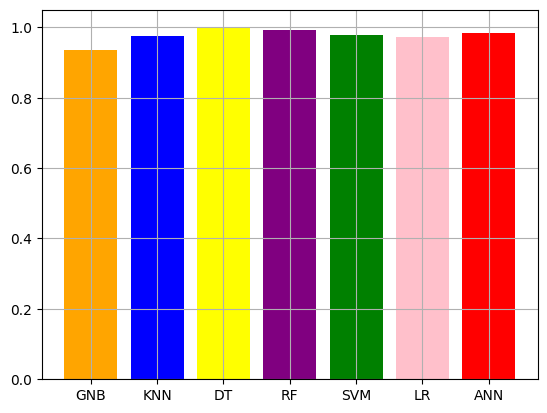

In [99]:
import matplotlib.pyplot as plt

acc_train=[acc_train_gnb,acc_train_knn,acc_train_dt,acc_train_rf,acc_train_svm,acc_train_lr,acc_train_ann]
title=['GNB','KNN','DT','RF','SVM','LR','ANN']
colors=['orange','blue','yellow','purple','green','pink','red']

plt.bar(title,acc_train,color=colors)
plt.grid()
plt.show()

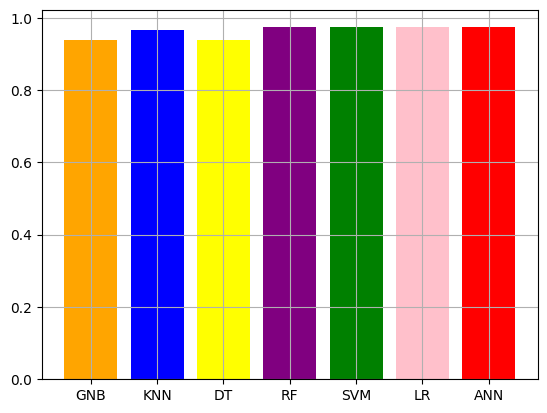

In [100]:
acc_test=[acc_test_gnb,acc_test_knn,acc_test_dt,acc_test_rf,acc_test_svm,acc_test_lr,acc_test_ann]
title=['GNB','KNN','DT','RF','SVM','LR','ANN']
colors=['orange','blue','yellow','purple','green','pink','red']

plt.bar(title,acc_test,color=colors)
plt.grid()
plt.show()

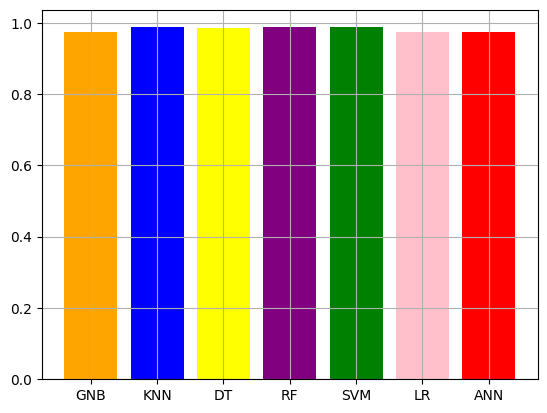

In [101]:
p=[p_gnb,p_knn,p_dt,p_rf,p_svm,p_lr,p_ann]
title=['GNB','KNN','DT','RF','SVM','LR','ANN']
colors=['orange','blue','yellow','purple','green','pink','red']

plt.bar(title,p,color=colors)
plt.grid()
plt.show()

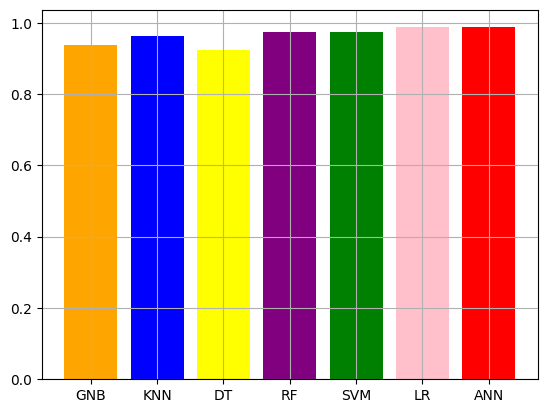

In [102]:
r=[r_gnb,r_knn,r_dt,r_rf,r_svm,r_lr,r_ann]
title=['GNB','KNN','DT','RF','SVM','LR','ANN']
colors=['orange','blue','yellow','purple','green','pink','red']

plt.bar(title,r,color=colors)
plt.grid()
plt.show()